<a href="https://colab.research.google.com/github/Katherineparra1/pythonprojects/blob/main/Mini_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 



df_diabetes= pd.read_csv('https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv')

##**Overview:**

In [106]:
df_diabetes.head

<bound method NDFrame.head of         encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]>

In [107]:
df_diabetes.columns 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [108]:
df_diabetes.drop(['payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton'], axis=1, inplace=True)


In [88]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,Steady,No,No,No,No,No,Ch,Yes,NO


In [109]:
#sns.histplot(df_diabetes['readmitted'], bins=20)
plt.show()

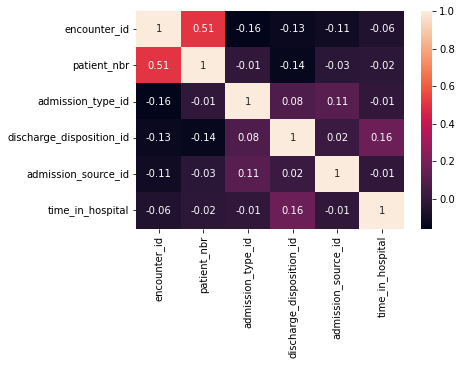

In [110]:
correlation_matrix = df_diabetes.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [111]:
variation_dummies= pd.get_dummies(df_diabetes['readmitted'], drop_first= True)

In [112]:
variation_dummies

,>30,NO
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
101761,1,0
101762,0,1
101763,0,1
101764,0,1


In [113]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
diabetes_countvectorizer= vectorizer.fit_transform(df_diabetes['readmitted'])

In [114]:
diabetes_countvectorizer.shape

(101766, 2)

In [115]:
type(diabetes_countvectorizer)

scipy.sparse.csr.csr_matrix

In [116]:
print(vectorizer.get_feature_names())

['30', 'no']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
print(diabetes_countvectorizer.toarray())

[[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [118]:
df_diabetes.drop(['readmitted'], axis=1 , inplace= True)
readmitted= pd.DataFrame(diabetes_countvectorizer.toarray())

In [120]:
df_diabetes=pd.concat([df_diabetes, readmitted], axis=1)

In [121]:
df_diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,0,1
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,No,No,No,No,No,No,No,No,0,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,Up,No,No,No,No,No,Ch,Yes,1,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,Up,No,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,Steady,No,No,No,No,No,Ch,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,Down,No,No,No,No,No,Ch,Yes,1,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,Steady,No,No,No,No,No,No,Yes,0,1
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,Down,No,No,No,No,No,Ch,Yes,0,1
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,Up,No,No,No,No,No,Ch,Yes,0,1


In [ ]:
X = df_diabetes.drop(['readmitted'], axis=1)

In [ ]:
X

In [ ]:
y=df_diabetes['readmitted']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 30, criterion = 'readmitted')
randomforest_classifier.fit(X_train, y_train)

In [ ]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)

In [ ]:
print(classification_report(y_train, y_predict_train))

In [ ]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)